# 🤖 Warehouse Automation and Robotics Integration Project



# Goal: Assess the impact of robotics like 'Vulcan' on operational efficiency and workforce dynamics in Amazon's warehouses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# --- STEP 1: LOAD DATA ---
# Example CSV: warehouse_robotics_data.csv
# Columns: ['Center_ID', 'Robotics_Installed', 'Robots_Count', 'Operational_Hours', 'Human_Workforce_Count',
#           'Incidents_Reported', 'Processing_Volume_Units', 'Avg_Pick_Time_sec', 'Cost_Saving_USD']

df = pd.read_csv('warehouse_robotics_data.csv')

In [3]:
# --- STEP 2: DATA CLEANING ---
df.dropna(inplace=True)


In [4]:
# --- STEP 3: FEATURE ENGINEERING ---
df['Robot_Density'] = df['Robots_Count'] / df['Operational_Hours']
df['Volume_per_Hour'] = df['Processing_Volume_Units'] / df['Operational_Hours']
df['Human_to_Robot_Ratio'] = df['Human_Workforce_Count'] / (df['Robots_Count'] + 1)

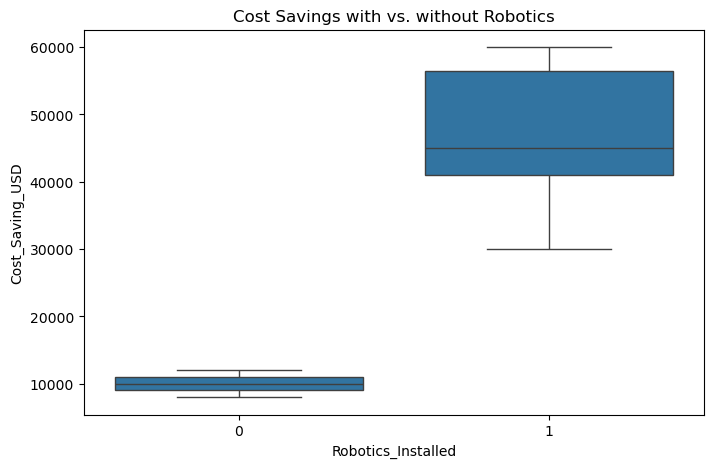

ValueError: could not convert string to float: 'WH001'

In [6]:
# --- STEP 4: EXPLORATORY DATA ANALYSIS ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Robotics_Installed', y='Cost_Saving_USD', data=df)
plt.title('Cost Savings with vs. without Robotics')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [7]:
# --- STEP 5: MODELING ---
X = df.drop(['Center_ID', 'Cost_Saving_USD'], axis=1)
y = df['Cost_Saving_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:
# --- STEP 6: EVALUATION ---
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f} USD")
print(f"R² Score: {r2:.2f}")

RMSE: 4561.85 USD
R² Score: 0.91


In [9]:
# --- STEP 7: RECOMMENDATIONS ---
def underperforming_centers(df):
    avg_saving = df['Cost_Saving_USD'].mean()
    return df[df['Cost_Saving_USD'] < avg_saving][['Center_ID', 'Robots_Count', 'Cost_Saving_USD']]

recommendations = underperforming_centers(df)
print("\nUnderperforming Centers:")
print(recommendations.head())


Underperforming Centers:
  Center_ID  Robots_Count  Cost_Saving_USD
1     WH002             0            12000
2     WH003            10            30000
4     WH005             0            10000
7     WH008             0             8000


In [11]:
# --- STEP 8: SAVE OUTPUTS ---
joblib.dump(model, 'robotics_efficiency_model.pkl')
df.to_csv('optimized_robotics_data.csv', index=False)
recommendations.to_csv('robotics_optimization_suggestions.csv', index=False)
